Number of samples (rows):  5
Number of features (cols):  5


Enter X matrix row by row:


 1 2 3 4 5
 6 7 8 9 10
 11 12 13 14 15
 16 17 18 19 20
 21 22 23 24 25


Enter Y vector:


 3 4 5 6 7


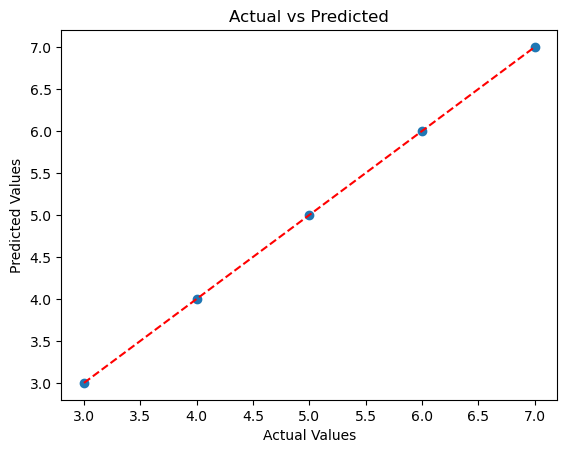

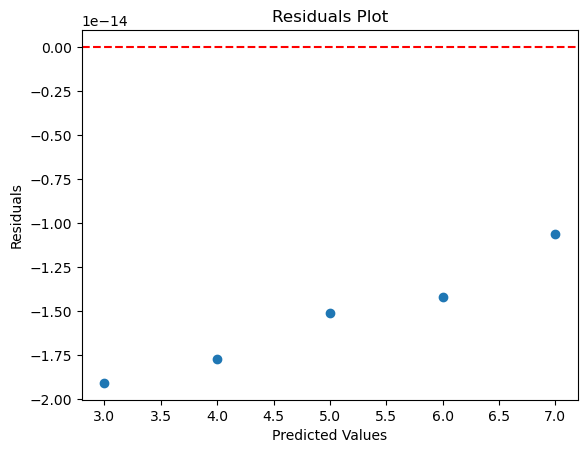

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MulLinearRegression:
    def __init__(self):
        self.X = None
        self.y = None
        self.beta = None

    def take_input(self):
        rows = int(input("Number of samples (rows): "))
        cols = int(input("Number of features (cols): "))

        X = []
        print("Enter X matrix row by row:")
        for _ in range(rows):
            X.append(list(map(float, input().split())))
        X = np.array(X)

        print("Enter Y vector:")
        y = np.array(list(map(float, input().split())))

        ones = np.ones((rows, 1))
        self.X = np.hstack((ones, X))
        self.y = y

    def fit(self):
        self.beta = np.linalg.pinv(self.X.T @ self.X) @ self.X.T @ self.y
        return self.beta

    def predict(self, X_new):
        ones = np.ones((X_new.shape[0], 1))
        X_new = np.hstack((ones, X_new))
        return X_new @ self.beta

    def r2_score(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot

    # Plot: Actual vs Predicted
    def plot_actual_vs_predicted(self):
        y_pred = self.X @ self.beta
        plt.scatter(self.y, y_pred)
        plt.plot([self.y.min(), self.y.max()],
                 [self.y.min(), self.y.max()], 'r--')
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs Predicted")
        plt.show()

    # Plot: Residuals
    def plot_residuals(self):
        y_pred = self.X @ self.beta
        residuals = self.y - y_pred
        plt.scatter(y_pred, residuals)
        plt.axhline(0, color='r', linestyle='--')
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.title("Residuals Plot")
        plt.show()
model = MulLinearRegression()
model.take_input()
model.fit()

model.plot_actual_vs_predicted()
model.plot_residuals()
